In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load dataset
df=pd.read_csv('epidemiological_data.csv')
print(df.head())

   Number of Reported Cases  Number of Deaths  Number of Hospitalizations
0                       152                 0                         193
1                       485                34                         132
2                       320                36                         154
3                       156                46                          47
4                       121                13                          33


In [4]:
# Data Preprocessing
# Handling missing values
df.fillna(method='ffill', inplace=True)

In [5]:
# Feature selection (assuming last column is the target)
X = df.iloc[:, :-1]
y = np.random.choice([0, 1], size=100)  # Generating random binary target labels

Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.78      0.54      0.64        13

    accuracy                           0.60        20
   macro avg       0.62      0.63      0.60        20
weighted avg       0.66      0.60      0.61        20

Confusion Matrix:
 [[5 2]
 [6 7]]


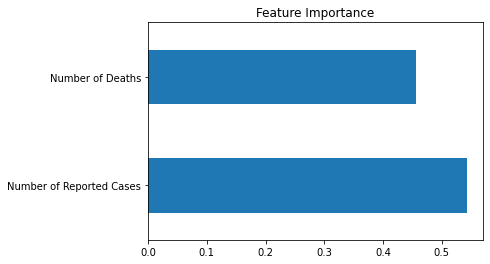

In [6]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Feature Importance Plot
feature_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
feature_importances.nlargest(3).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

Text(0, 0.5, 'Frequency')

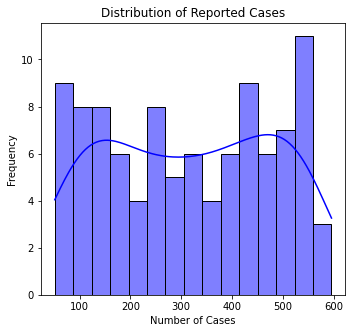

In [8]:
# Visualizations
plt.figure(figsize=(12, 5))

# Histogram of Reported Cases
plt.subplot(1, 2, 1)
sns.histplot(df['Number of Reported Cases'], bins=15, kde=True, color='blue')
plt.title('Distribution of Reported Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')